<a href="https://colab.research.google.com/github/cavendano01/Data-Sciences-Galileo/blob/main/Image-Recognition/lab1_deteccion_de_bordes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow

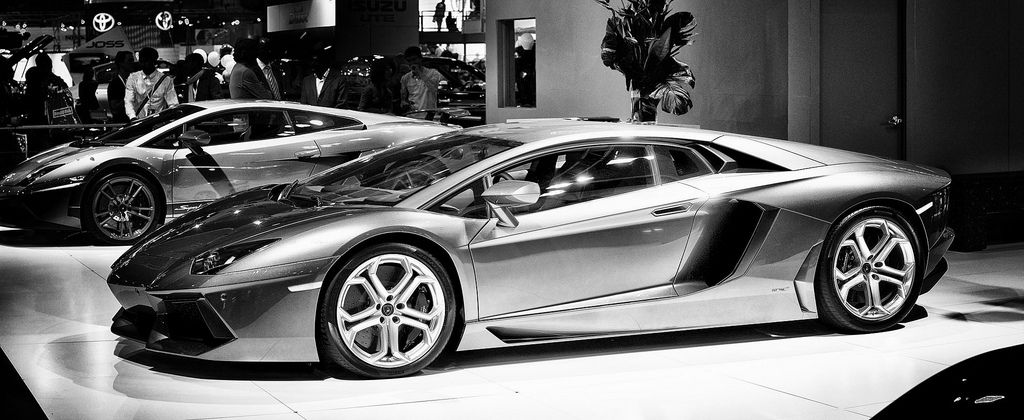

In [ ]:
#import image
strImg = '/content/carro.jpg'
image = cv2.imread(strImg ,cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)


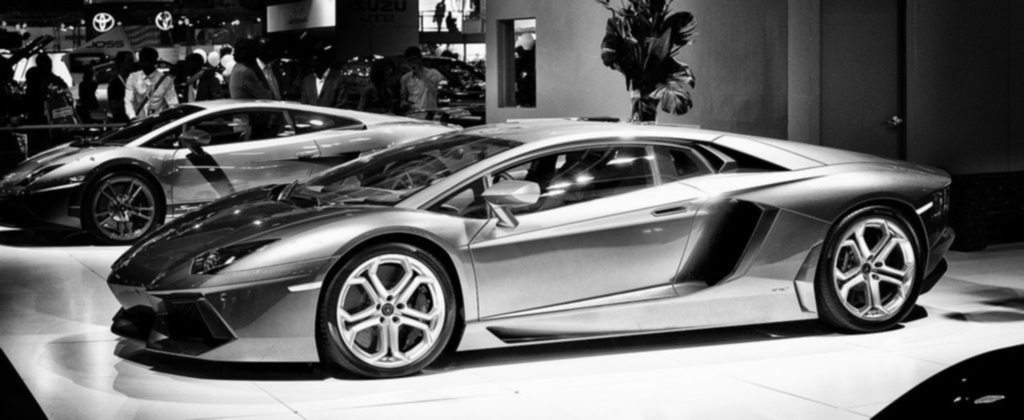

In [ ]:
img = cv2.GaussianBlur(gray,(3,3),0)
cv2_imshow(img)

In [ ]:
def derivadaX(img):
  alto = img.shape[0]
  ancho = img.shape[1]

  DerivadaX = np.zeros((alto, ancho, 1))

  #kernel = np.array ([[1/16.,2/16.,1/16.],[2/16.,4/16.,2/16],[1/16.,2/16.,1/16.]])
  #img = convolutional_filter(img,kernel)

  for i in range(0, alto):
      for j in range(0, ancho -1):
          derX = img[i, j+1] - img[i, j]
          DerivadaX[i, j] = derX
  cv2_imshow(DerivadaX)
  return DerivadaX     


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


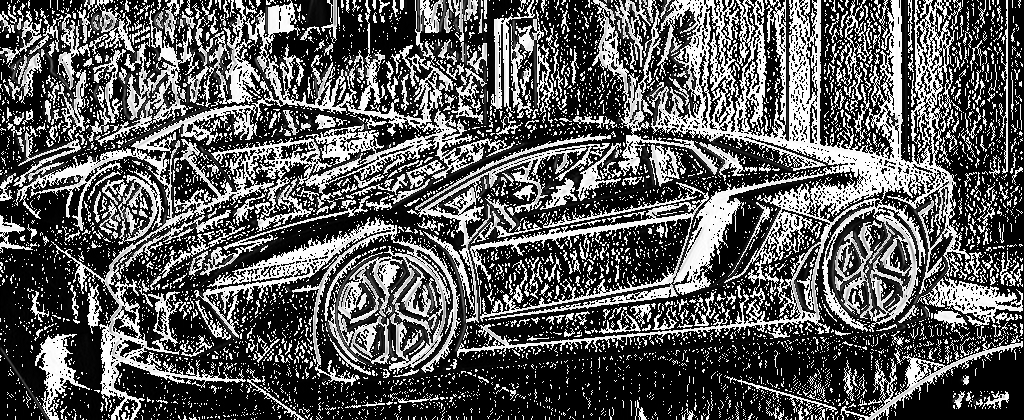

In [ ]:
derX = derivadaX(img)

In [ ]:
def derivadaY(img):
  alto = img.shape[0]
  ancho = img.shape[1]

  DerivadaY = np.zeros((alto, ancho, 1))
  
  #kernel = np.array ([[1/16.,2/16.,1/16.],[2/16.,4/16.,2/16],[1/16.,2/16.,1/16.]])
  #img = convolutional_filter(img,kernel)

  for i in range(0, alto-1):
      for j in range(0, ancho):
          derY = img[i+1, j] - img[i, j]
          DerivadaY[i, j] = derY
  cv2_imshow(DerivadaY)
  return DerivadaY   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':


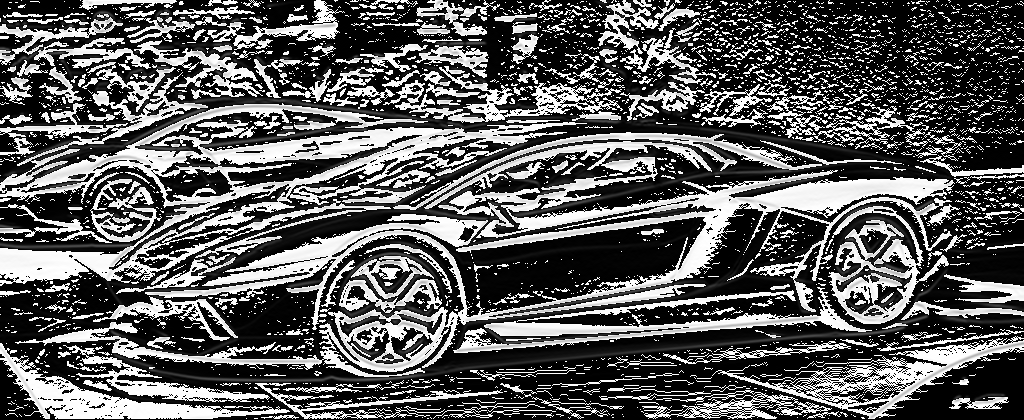

In [ ]:
derY = derivadaY(blur)

In [ ]:
def magnitud(dx,dy):
  alto = img.shape[0]
  ancho = img.shape[1]

  magnitud = np.zeros((alto, ancho, 1))

  for i in range(0, alto):
      for j in range(0, ancho):
        mag = math.sqrt(dx[i,j]**2 + dy[i,j]**2)
        magnitud[i,j]= mag
  cv2_imshow(magnitud)
  return magnitud   

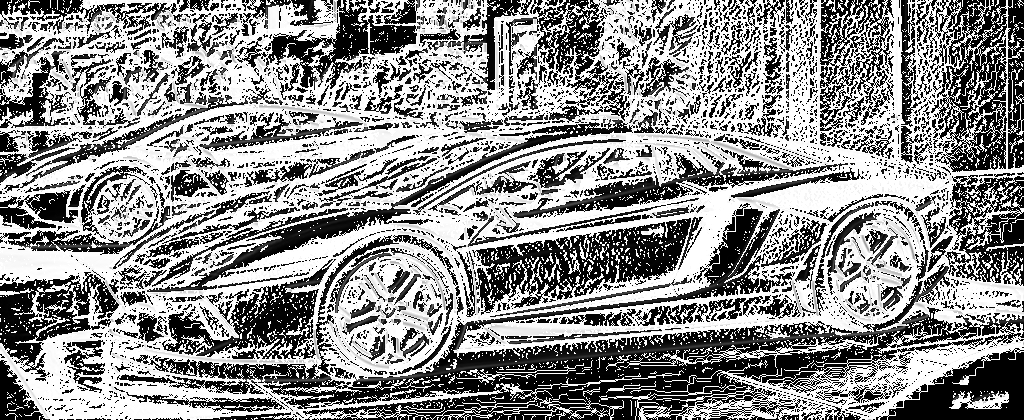

In [ ]:
magImage = magnitud(derX,derY)

In [ ]:
def fase(dx,dy):
  alto = img.shape[0]
  ancho = img.shape[1]

  fase = np.zeros((alto, ancho, 1))

  for i in range(0, alto):
    for j in range(0, ancho):
      angulo = int((180/math.pi)*math.atan2(dy[i,j],dx[i,j]))
      fase[i,j]= angulo
  cv2_imshow(fase)
  return fase   


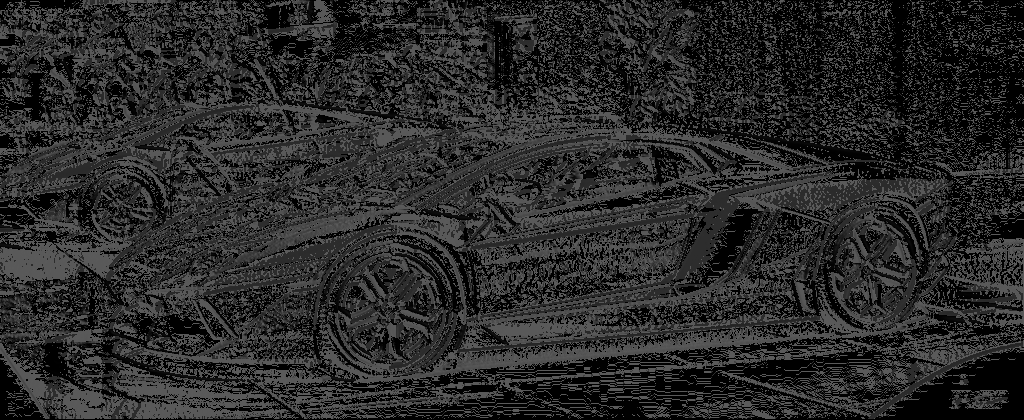

In [ ]:
phaseImage = fase(derX,derY)

In [ ]:
def non_maximum_suppression(magImage, phaseImage):
    alto = magImage.shape[0]
    ancho =  magImage.shape[1]
    
    newImg = np.zeros((alto, ancho,1))
    val1 = 0
    val2 = 0
    val3 = 0
    alpha = 0.1
    for i in range(1, alto - 2):
        for j in range(1, ancho - 2):
            ventana = magImage[i-1:i+2, j-1:j+2]
            angulo = phaseImage[i, j]
            vDerecha = magImage[i - 1, j]
            vIzquierda = magImage[i + 1, j]
            if(((angulo > 337)  or (angulo <= 23)) or ((angulo >= 157) and (angulo <= 203))):
                val1 = ventana[1,0]
                val2 = ventana[1,1]
                val3 = ventana[1,2]
            elif(((angulo > 23) and (angulo <= 67)) or ((angulo > 203) and (angulo <= 248))):
                val1 = ventana[0,2]
                val2 = ventana[1,1]
                val3 = ventana[2,0]
            elif(((angulo > 67) and (angulo <= 113)) or ((angulo > 248) and (angulo <= 293))):
                val1 = ventana[0,1]
                val2 = ventana[1,1]
                val3 = ventana[2,1]
            elif(((angulo > 293) and (angulo <= 337)) or ((angulo > 113) and (angulo <= 157))):
                val1 = ventana[0,0]
                val2 = ventana[1,1]
                val3 = ventana[2,2]
            
            if((val2 >= val1) and (val2 >= val3)):
                newImg[i, j] = val2 
                #newImg[i,j] = alpha*val1 + (1-alpha)*val3
                #newImg[i, j] = 255
            else:
                newImg[i, j] = 0     
    return newImg




In [ ]:
non_max = non_maximum_suppression(magImage, phaseImage)

In [ ]:
def treshold(img):
  alto = img.shape[0]
  ancho = img.shape[1]

  NewImg = np.zeros((alto, ancho, 1))

  for i in range(0, alto):
    for j in range(0, ancho):
      if (img[i,j]>12):
        NewImg[i,j] = 225
      else:
        NewImg[i,j]    
  cv2_imshow(NewImg)
  return NewImg   

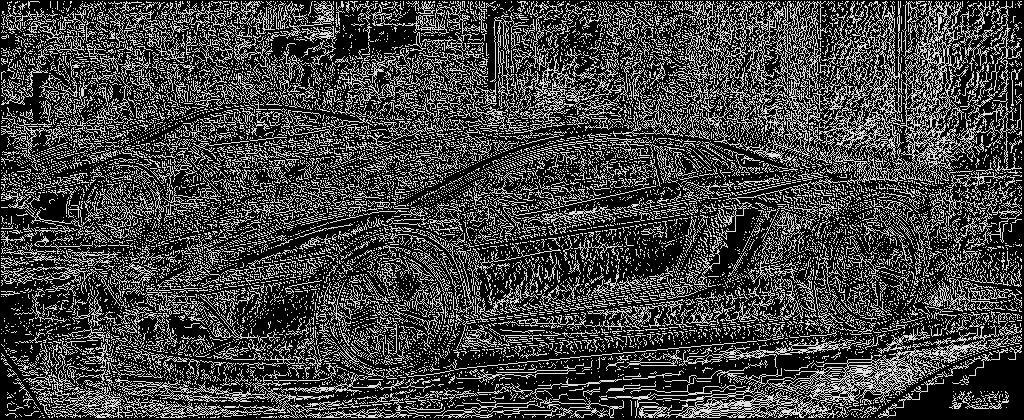

In [ ]:
treshold_img = treshold(non_max)

# Open CV

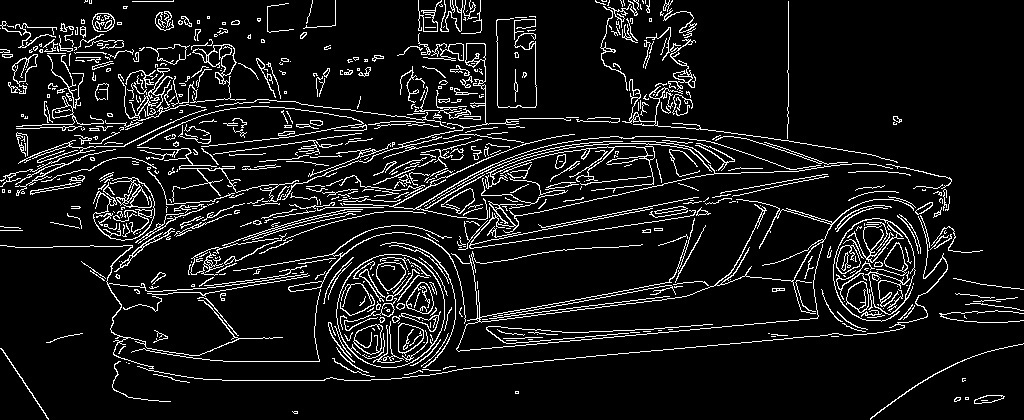

In [ ]:
edges = cv2.Canny(img,100,200)
cv2_imshow(edges)